<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/CNN_Performance_on_Car_Images_Dataset_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment: Car Image Classification

#### Objective:

This assignment aims to help You build an image classification model for car images using a deep learning framework like TensorFlow/Keras. You will preprocess images, train a model, and evaluate its performance.

#### Tasks:

1. **Dataset Setup:**

   * Download the "Car Image Dataset" from https://www.kaggle.com/datasets/kshitij192/cars-image-dataset/data.
   * Unzip the dataset and upload the training and test datasets to your Google Drive (or local machine if not using Colab).

2. **Environment Setup:**

   * Import necessary libraries, including `numpy`, `pandas`, and `tensorflow`.
   * Mount Google Drive if using Google Colab to access the dataset.

3. **Data Preprocessing:**

   * Load the images from the train and test directories.
   * Resize images to a standard size (e.g., 128x128 or 224x224).
   * Normalize pixel values by scaling the images to a range of 0 to 1.
   * Perform data augmentation (e.g., flipping, rotation) to increase model robustness.

4. **Model Construction:**

   * Build a CNN model using Keras.

     * Add convolutional layers, followed by pooling layers, and flatten the output.
     * Add one or more fully connected layers.
     * Include a softmax output layer for multi-class classification.
   * Compile the model with an appropriate optimizer, loss function, and evaluation metric.

5. **Model Training:**

   * Train the model using the training set and evaluate it on the test set.
   * Record performance metrics such as accuracy, loss, and time taken to train.

6. **Evaluate the Model:**

   * Evaluate the model’s performance on the test data.
   * Plot the training and validation loss/accuracy curves.
   * Discuss the results and explain any overfitting or underfitting observed.

7. **Model Optimization (Optional):**

   * Explore different optimizers, learning rates, and batch sizes to improve the model's performance.
   * Apply techniques like dropout, batch normalization, or transfer learning if needed.

8. **Conclusion:**

   * Summarize the results of the classification task.
   * Discuss how well the model performed and suggest potential improvements.

#### Submission:

* Submit the Jupyter notebook with all code and explanations for each step.
* Include visualizations of the model's training progress and evaluation metrics.

#### Grading Criteria:

* Correct implementation of data preprocessing.
* Proper construction, training, and evaluation of the CNN model.
* Clear and insightful interpretation of the results.
* Quality of code documentation and explanations.

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Environment Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Dataset Paths
train_path = '/content/drive/MyDrive/Cars Dataset/train'
test_path = '/content/drive/MyDrive/Cars Dataset/test'

# Verify paths
print("Train directory contents:", os.listdir(train_path))
print("Test directory contents:", os.listdir(test_path))

Train directory contents: ['Toyota Innova', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Audi', 'Tata Safari', 'Swift']
Test directory contents: ['Swift', 'Toyota Innova', 'Tata Safari', 'Rolls Royce', 'Audi', 'Mahindra Scorpio', 'Hyundai Creta']


In [3]:
# Data Preprocessing
IMG_SIZE = (224, 224)  # Standard size for pretrained models
BATCH_SIZE = 32
NUM_CLASSES = 7  # We have 7 car classes

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% for validation
)

# For test data - only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [4]:
# Get class names
class_names = list(train_generator.class_indices.keys())
print("\nClass names:", class_names)


Class names: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [5]:
# Model Construction
def build_model():
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Flatten and dense layers
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = build_model()
model.summary()

# Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,391 (84.87 MB)

 Trainable params: 22,247,431 (84.87 MB)

 Non-trainable params: 960 (3.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 977s 12s/step - accuracy: 0.2420 - loss: 2.6277 - val_accuracy: 0.1484 - val_loss: 17.9390
Epoch 2/30
 1/83 ━━━━━━━━━━━━━━━━━━━━ 11:41 9s/step - accuracy: 0.3750 - loss: 2.0004

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 362ms/step - accuracy: 0.3750 - loss: 2.0004 - val_accuracy: 0.1406 - val_loss: 18.9053
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 539s 6s/step - accuracy: 0.3023 - loss: 2.1034 - val_accuracy: 0.2297 - val_loss: 15.0507
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.3125 - loss: 1.9730 - val_accuracy: 0.2203 - val_loss: 15.7935
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 555s 7s/step - accuracy: 0.3201 - loss: 1.9900 - val_accuracy: 0.2344 - val_loss: 2.9577
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 355ms/step - accuracy: 0.3438 - loss: 1.9640 - val_accuracy: 0.2234 - val_loss: 2.9536
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 541s 6s/step - accuracy: 0.3248 - loss: 1.9710 - val_accuracy: 0.2438 - val_loss: 5.6952
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 356ms/step - accuracy: 0.3125 - loss: 2.1500 - val_accuracy: 0.2500 - val_loss: 5.6857
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 562s 7s/step - accuracy: 0.3535 - loss: 1.8406 - val_accuracy: 0.2719 - v

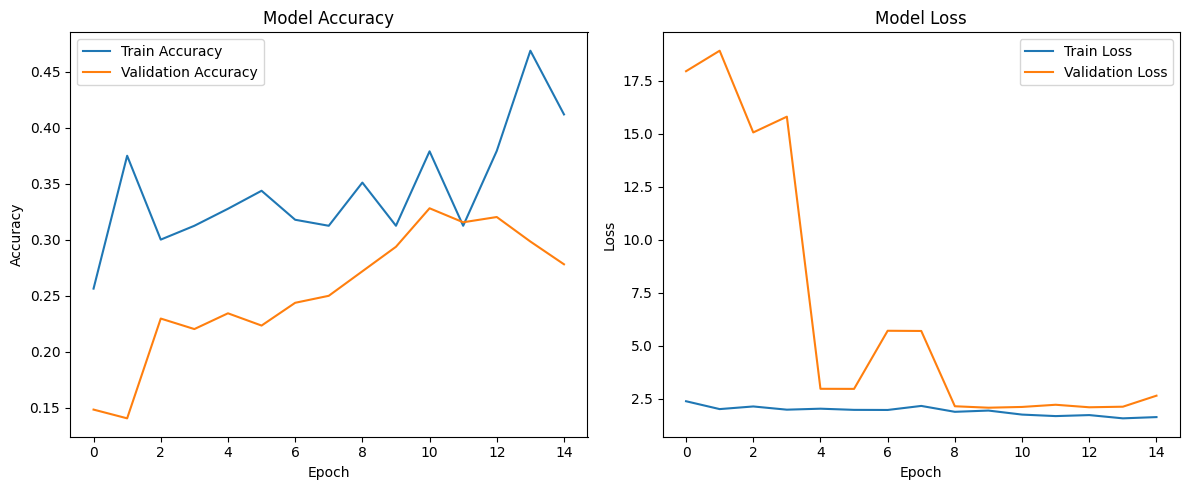

In [6]:
# Model Evaluation
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification report
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

26/26 ━━━━━━━━━━━━━━━━━━━━ 232s 9s/step - accuracy: 0.3950 - loss: 1.6591

Test Accuracy: 0.2989
Test Loss: 1.9629
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step

Classification Report:
                  precision    recall  f1-score   support

            Audi       0.31      0.59      0.40       199
   Hyundai Creta       0.00      0.00      0.00        67
Mahindra Scorpio       0.00      0.00      0.00        75
     Rolls Royce       0.00      0.00      0.00        74
           Swift       0.31      0.15      0.20       102
     Tata Safari       0.23      0.65      0.33       106
   Toyota Innova       0.59      0.22      0.32       190

        accuracy                           0.30       813
       macro avg       0.20      0.23      0.18       813
    weighted avg       0.28      0.30      0.24       813



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


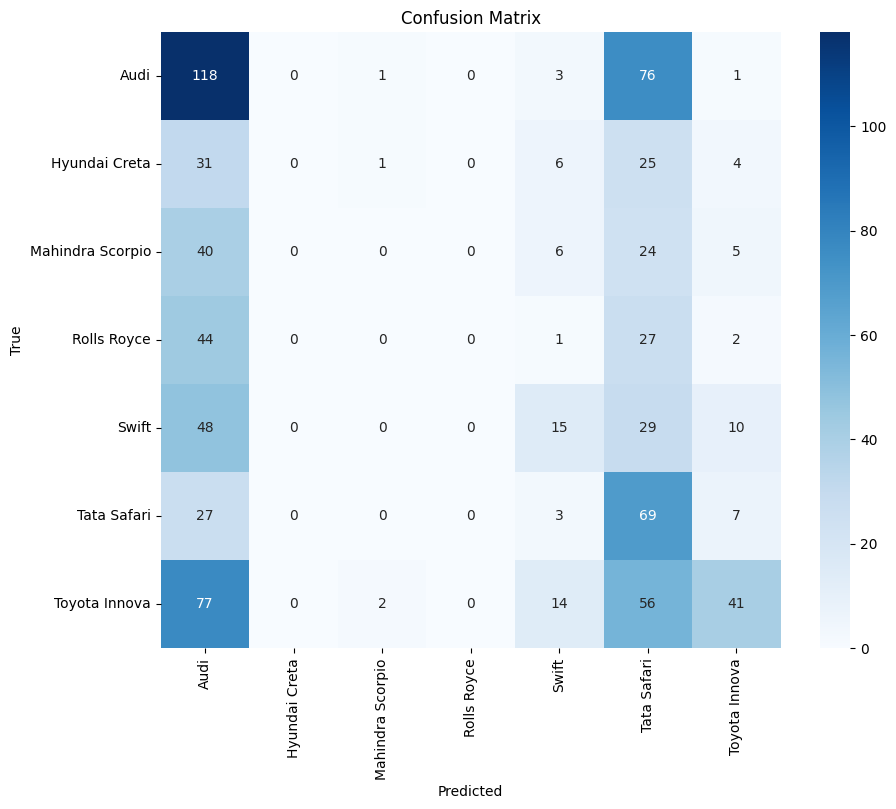

In [8]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


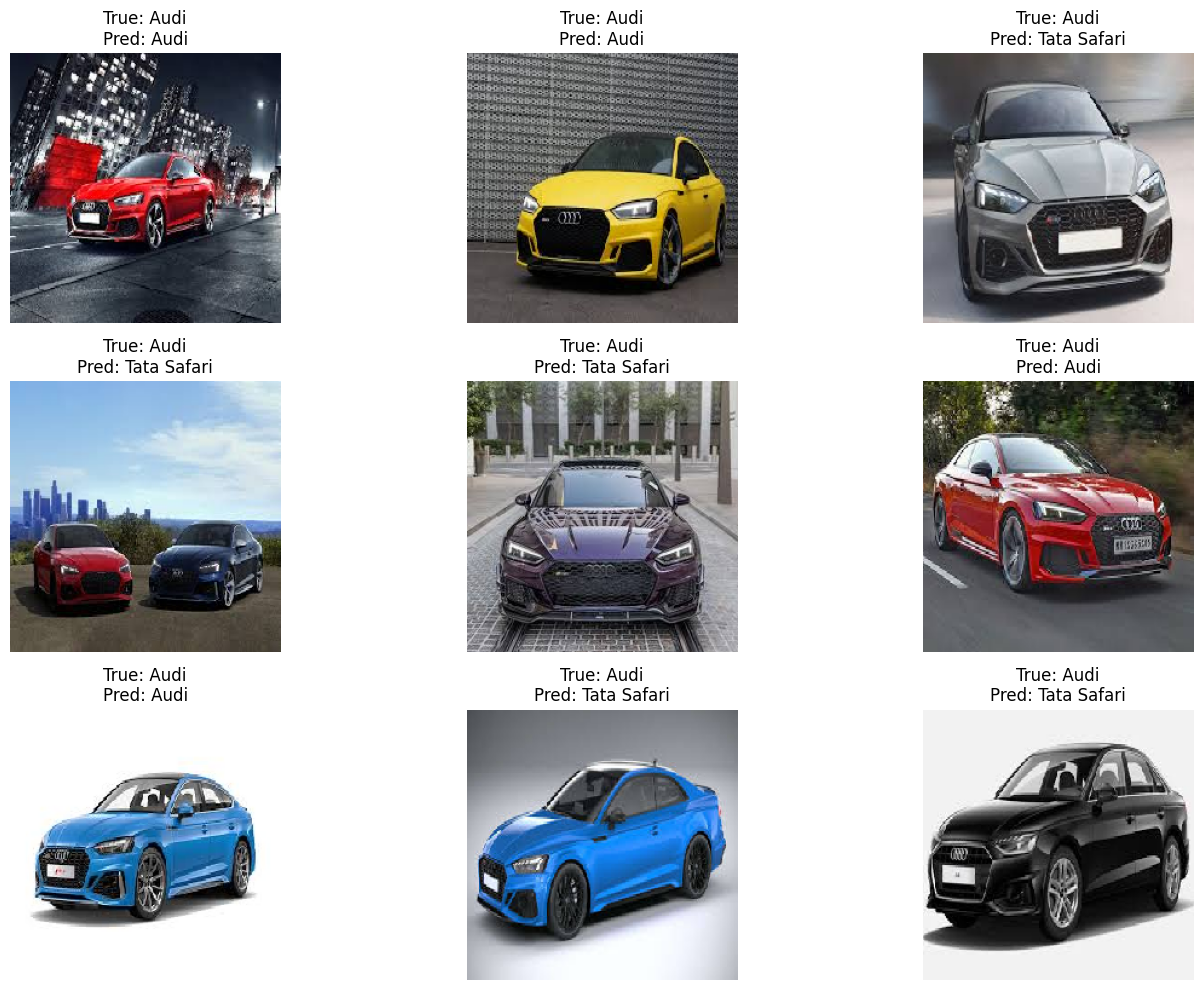

In [9]:
# Sample predictions
sample_images, sample_labels = next(test_generator)
sample_preds = model.predict(sample_images)
sample_pred_classes = np.argmax(sample_preds, axis=1)
sample_true_classes = np.argmax(sample_labels, axis=1)

plt.figure(figsize=(15, 10))
for i in range(min(9, len(sample_images))):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_true_classes[i]]}\nPred: {class_names[sample_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
print("Suggestions to Improve Model Performance and Accuracy:\n")
print("1. BALANCE DATASET...This is the Most Important Fix:")
print("""Current issue: I have 814 Audi samples vs 271 Hyundai Creta samples.
Solution: Either:
a) Use data augmentation on minority classes
b) Randomly reduce samples from majority classes
c) Combination of both""")

print("\n2. INCREASE EPOCHS WITH EARLY STOPPING:")
print("""Current: 15 epochs
Better: 40-50 epochs with careful monitoring""")

print("\n3. CLASS WEIGHTS (Quick Fix for Imbalance):")
print("""It will Automatically gives more importance to minority classes:""")

print("\n4. IMPROVE MODEL ARCHITECTURE:")
print("""Current model may be too simple. We can Try:""")
print("""
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    GlobalAveragePooling2D(),  # Better than Flatten
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])""")


print("\nImplementation Recommendation Order:")
print("1. Balance dataset (most important)")
print("2. Add class weights (quick win)")
print("3. Try transfer learning")
print("4. Improve model architecture")
print("5. Add learning rate scheduling")
print("6. Increase epochs with careful monitoring")
print("7. Experiment with image size")
print("8. Add TTA for final boost")

print("\nExpected Accuracy Improvements:")
print("- Balancing alone could give +15-20%")
print("- Transfer learning +10-15%")
print("- Combined fixes should get you to 75-85% accuracy")

Suggestions to Improve Model Performance and Accuracy:

1. BALANCE DATASET...This is the Most Important Fix:
Current issue: I have 814 Audi samples vs 271 Hyundai Creta samples.
Solution: Either:
a) Use data augmentation on minority classes
b) Randomly reduce samples from majority classes
c) Combination of both

2. INCREASE EPOCHS WITH EARLY STOPPING:
Current: 15 epochs
Better: 40-50 epochs with careful monitoring

3. CLASS WEIGHTS (Quick Fix for Imbalance):
It will Automatically gives more importance to minority classes:

4. IMPROVE MODEL ARCHITECTURE:
Current model may be too simple. We can Try:

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    GlobalAveragePooling2D(),  # Better than Flatten
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

Implementation Recommendation